# **TITANIC - SOLUTIONS**

In this exercise, you'll be analyzing data about the passengers of the infamous Titanic in Python.

You will learn how to:

* compute summary statistics (mean, median, standard deviation, etc.);
* construct contigency and pivot tables;
* make and interpret basic plots.

We'll be using the well-known **pandas** library for data manipulation, and **seaborn** library for plotting. It's OK if you've never worked with them before: you can learn from the examples given in the exercise.

**Run each cell step-by-step, filling in some code where necessary and answering some occasional questions.**


## **Some history**

![titanic.jpeg](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/320px-RMS_Titanic_3.jpg)

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

Let's try to investigate it using the data!

## **Importing the libraries**
*Don't change the code in this section.*

In [1]:
# library for fast computations
import numpy as np

# data manipulation library
import pandas as pd

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the data**

The data we'll be working with contains information about 714 passengers on Titanic:
* **PassengerId** - passenger's ID;
* **Name** - passenger's name;
* **Sex** - passenger's sex (*male* or *female*);
* **Age** - passenger's age;
* **Pclass** - ticket class (1 = 1st 2 = 2nd, 3 = 3rd);
* **Fare** - ticket price;
* **Survived** - passenger's survival (0 = died, 1 = survived).

The code below loads the data into a data structure called DataFrame and displays the first couple of rows from it.

In [2]:
url = 'https://github.com/evgeniyako/datasets/raw/main/titanic.csv'
titanic = pd.read_csv(url)

In [3]:
# Dimensions of the data (number of rows, number of columns)
print(titanic.shape)

(714, 7)


In [4]:
# Showing the first 5 rows from the data
# (to show more, pass another number to the head() method
#  e.g., titanic.head(10))
titanic.head()

,PassengerId,Name,Sex,Age,Pclass,Fare,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,3,7.2500,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,1
2,3,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,1
4,5,"Allen, Mr. William Henry",male,35.0,3,8.0500,0


## **Data types**

**Which of the variables in the dataset are**
- numeric
- categorical
- continious
- discrete 

TYPE YOUR ANSWER HERE

## **Summary statistics**

Who were the passengrs on Titanic? Let's try to describe them using summary statistics.


### *Mean, median and standard deviation*

What was the average age of all the Titanic passengers? 

Let's compute both mean and median using the methods *mean()* and *median()* respectively:


In [5]:
avg_age = titanic['Age'].mean()
print('Mean age is', avg_age, 'years')

Mean age is 29.69911764705882 years


In [6]:
median_age = titanic['Age'].median()
print('Median age is', median_age, 'years')

Median age is 28.0 years


How different were the passengers' ages from the average? 

To answer this question, let's compute the standard deviation using the *std()* method:



In [7]:
std_age = titanic['Age'].std()
print('Standard deviation:', std_age, 'years')

Standard deviation: 14.526497332334044 years


**Compute the mean and median ticket price, as well as it's standard deviation.**

In [8]:
# YOUR CODE HERE
avg_fare = titanic['Fare'].mean()
median_fare = titanic['Fare'].median()
std_fare = titanic['Fare'].std()

print('Mean fare: ', avg_fare)
print('Median fare: ', median_fare)
print('Standard deviation: ', std_fare)

Mean fare:  34.69451400560218
Median fare:  15.7417
Standard deviation:  52.9189295025436


In [32]:
pd.pivot_table(data=titanic[titanic['Fare'] > 0], values='Fare', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Fare,89.403575,21.471556,13.380198


In [31]:
pd.pivot_table(data=titanic[titanic['Fare'] > 0], values='Fare', columns='Pclass', aggfunc=['min', 'max'])

min                     max               
Pclass    1     2       3         1     2        3
Fare    5.0  10.5  4.0125  512.3292  73.5  56.4958

**Compare the mean and the median fares you've obtained above. Are they different? If so, what can be causing it?**

TYPE YOU ANSWER HERE

### *Mode*

Were there more men or women on board? 

Let's answer this question by computing the number of male and female passengers. For that, we'll use the *value_counts()* method that counts the number of occurances of each possible value of a variable:

In [9]:
titanic['Sex'].value_counts()

male      453
female    261
Name: Sex, dtype: int64

**How many passengers were there in each class, and what's the class with the most passengers?**

In [10]:
# YOUR CODE HERE
titanic['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

### *Pivot tables*

Were male and female passengers, on average, of the same age?

Let's investgate the dependency between the Sex and Age variables by constructing a pivot table. We'll use the *pivot_table()* function from pandas:

In [11]:
pd.pivot_table(data=titanic, values='Age', index='Sex', aggfunc='mean')

,Age
Sex,
female,27.915709
male,30.726645


Thus, we see that mean age of male passengers is almost 3 years higher than that of the female ones


In [12]:
# Note that we can also compute the median in each group by changing the value of the aggfunc parameter:
pd.pivot_table(data=titanic, values='Age', index='Sex', aggfunc='median')

,Age
Sex,
female,27.0
male,29.0


**What are the median ages of the passengers in each class? Answer this question by construting the corresponding pivot table.**

In [13]:
# YOUR CODE HERE
pd.pivot_table(data=titanic, values='Age', index='Pclass', aggfunc='mean')

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


### *Contingency tables*

How were male and female passegers distributed over the three classes? 

Let's construct a contingency table to see the relationship between the Sex and Pclass variables. We can use the *crosstab()* function from pandas:

In [14]:
pd.crosstab(titanic['Sex'], titanic['Pclass'])

Pclass,1,2,3
Sex,,,
female,85,74,102
male,101,99,253


In [15]:
# Note that we can also normalize the table across the rows
pd.crosstab(titanic['Sex'], titanic['Pclass'], normalize='index')

Pclass,1,2,3
Sex,,,
female,0.325670,0.283525,0.390805
male,0.222958,0.218543,0.558499


From the table above, we can see that a larger share of male passengers traveled in the third class: 56% compared to only 40% of the female passengers.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. 

Let's see if there were more men or women out of the survived passengers. We will construct a contingency table again:

In [35]:
# YOUR CODE HERE
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='columns')

Survived,0,1
Sex,,
female,0.150943,0.67931
male,0.849057,0.32069


From the table above we can see that out of all the passengers who survived, almost 68% were women and only 32% - men. Thus, it seems that women had a greater chance of surviving.

**Was there any relationship between survival and the travel class? Answer this quetsion by constructing a contigency table.**

In [17]:
# YOUR CODE HERE
pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.344086,0.655914
2,0.520231,0.479769
3,0.760563,0.239437


**Write down your observations**

TYPE YOUR ANSWER HERE

## **Basic plots**

### *Bar plots*

Let's visualize the number of passengers per class with a bar plot.

In [18]:
# First, construct a new DataFrame 
# with total counts of survived passengers per class
survived_per_class = titanic.groupby('Pclass')['Survived'].sum().reset_index()
survived_per_class

,Pclass,Survived
0,1,122
1,2,83
2,3,85


To make a bar plot, we'll use the barplot() function from the seaborn library:

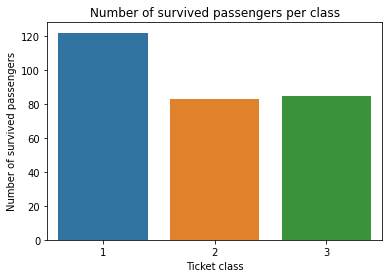

In [19]:
# Now, let's make a bar plot
sns.barplot(x='Pclass', y='Survived', data=survived_per_class)

_ = plt.title('Number of survived passengers per class') # Adding title
_ = plt.xlabel('Ticket class')                           # Adding labels for the axes
_ = plt.ylabel('Number of survived passengers')

On the X-axis, you see the three categories: ticket classes 1, 2 and 3. The heights of the bars represent the number of people in the corresponding category.

**Which colclusions can you make based on the plot above?**

TYPE YOU ANSWER HERE

### *Histograms*

A **historgam** takes a bunch of data and separates it into **bins**, or ranges of values. The height of each bar represents the number of observations that fall into the corresponding bin. Histograms help us see how the values are *distributed*.

Let's look at the distribution of the ages of the Titanic's passengers.

To make a histogram, we'll use the *histplot()* function from the seaborn library.

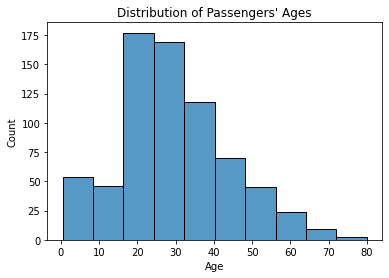

In [20]:
sns.histplot(x='Age', data=titanic, bins=10)

_ = plt.title("Distribution of Passengers' Ages") # Adding title


We can see that, for example, there were just over 50 passenger aged between 0 and 10 (first bin) and 175 passengers aged between 20 and 30 (third bin).

**Note that you can change the number of bins that are used to produce a histogram. Try to plot more histograms with less and more bins (e.g., with 3 and 100 bins) to see how it changes the plot.**

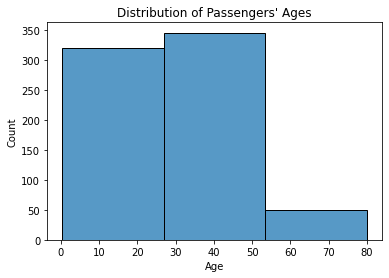

In [21]:
# YOUR CODE HERE
sns.histplot(x='Age', data=titanic, bins=3)
_ = plt.title("Distribution of Passengers' Ages") # Adding title

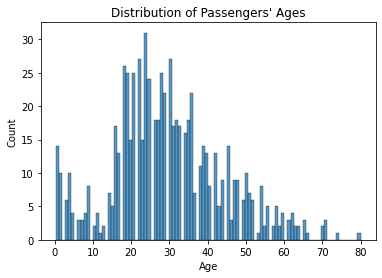

In [22]:
sns.histplot(x='Age', data=titanic, bins=100)
_ = plt.title("Distribution of Passengers' Ages") # Adding title

**Do the plots change a lot with different number of bins? Describe what you see.**

YOU ANSWER HERE

**What, in your opinion, the optimal number of bins would be and how would the plot look like?**

YOUR ANSWER HERE

### *Box plots*

A boxplot is a way of displaying the dataset based on a five-number summary: 

1. Minimum: the lowest data point excluding any outliers
2. Maximum: the largest data point excluding any outliers
3. Median
4. 25%-quantile
5. 75%-quantile

A boxplot is constructed of two parts, a box and a set of whiskers. 

The lower whisker is the minimum of the data, and the higher whisker is the maximum of the data *without outliers*.

The box is drawn from the 25%-quantile to the 75%-quantile. Therefore, 50% of the data values fall inside the box.

A horizontal line drawn in the middle of the box to denote the median.

The height of the box is called an Inter-Quartile Range (IQR). Points that lie more than 1.5*IQR away from the boarders of the box are considered to be outliers. Outliers (if any) are plotted with individual points.

Let's use boxplot to visualize the distribution of passengers' ages with respect to their travel class.
 

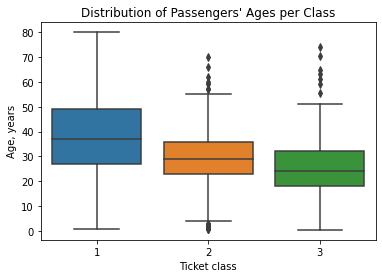

In [23]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

_ = plt.title("Distribution of Passengers' Ages per Class") # Adding title
_ = plt.xlabel('Ticket class')                              # Adding labels for the axes
_ = plt.ylabel('Age, years')

**Look at the boxplot above and answer the following questions:**

- Which class has the lowest median age of the passengers?
- What's the median age in the 2nd class?
- Are there any outliers in the age for the 1st class?
- Which class has the most variety in the ages of the passengers?


TYPE YOUR ANSWER HERE


### *Scatter plots*

Scatter plots are a great tool to visualize the relationship between the two numerical variables.

For example, let's see how passenger's age and their ticket fare are related.

We can make a scatter plot with the help of the *scatterplot()* function from the seaborn library.

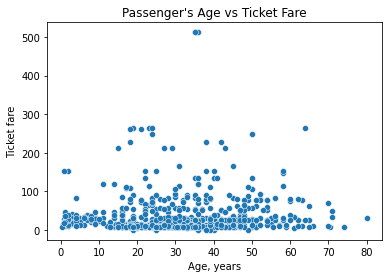

In [24]:
sns.scatterplot(x='Age', y='Fare', data=titanic)

_ = plt.title("Passenger's Age vs Ticket Fare") # Adding title
_ = plt.xlabel('Age, years')                    # Adding labels for the axes
_ = plt.ylabel('Ticket fare')

**Look at the plot above and answer the following question: is it true that older people bought more expensive tickets?**

TYPE YOUR ANSWER HERE